# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Michel </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats


In [97]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [98]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [99]:
df.loc[(df.Latitude >0), 'Hemisfério'] = 'Norte'
df.loc[(df.Latitude <0), 'Hemisfério'] = 'Sul'


In [100]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

Vemos que os terremotos de menor impacto ocorrem com mais frequência do que com os de maior impacto


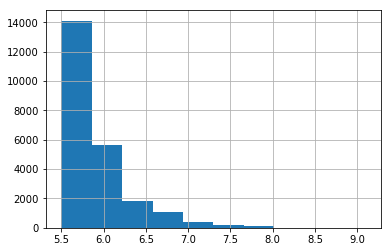

In [101]:
df.Magnitude.hist()
print("Vemos que os terremotos de menor impacto ocorrem com mais frequência do que com os de maior impacto")

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [102]:
df.Magnitude.describe()


count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64

In [103]:
mean=df.Magnitude.mean()
std=df.Magnitude.std()
std

0.4230656393157772

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

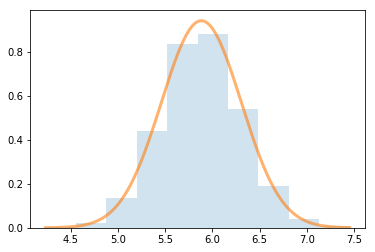

In [104]:

x=sorted(stats.norm.rvs(size=12345, scale=std, loc=mean))

plt.hist(x, normed=1, histtype='stepfilled', alpha=0.2)
plt.plot(x, stats.norm.pdf(x,  scale=std, loc=mean), lw=3, alpha=0.6)


## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [105]:
tabela= pd.crosstab(df.Hemisfério, df.Type, normalize=True, margins=True)
tabela

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,0.447140,0.000085,0.006279,0.000000,0.453505
Sul,0.545171,0.000085,0.001196,0.000043,0.546495
All,0.992311,0.000171,0.007475,0.000043,1.000000


In [106]:
prob=tabela.iloc[0,0]/tabela.iloc[0,4]
prob

0.98596590373928605

### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [107]:
prob=prob*100
print( "A probabilidade de ocorrer um terremoto no hemisfério norte é de", prob, "%")


A probabilidade de ocorrer um terremoto no hemisfério norte é de 98.5965903739 %


# Explique o seu raciocínio

após normalizar, eu peguei os valores da tabela em "terremoto" e "Hemisfério", ou seja, earthquake a Norte. Peguei o valor e multipliquei por 100 para dar a probabilidade

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [108]:
df.Hemisfério.value_counts()
#prob= 12794/(12794+10617)
a=df.Hemisfério == "Norte"
b=df.Type == "Nuclear Explosion"
c= a & b
print(a.value_counts())
print(c.value_counts())

False    12795
True     10617
Name: Hemisfério, dtype: int64
False    23265
True       147
dtype: int64


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [109]:
prob=147/10618
print("é de", prob*100, "%")

é de 1.3844415144094933 %


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

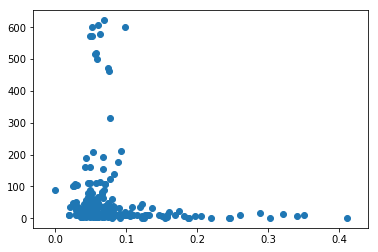

In [110]:


plt.scatter(df["Magnitude Error"], df.Depth)



Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [111]:
a=df["Magnitude Error"].corr(df.Depth)
print(a)

-0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

A correlação é negativa, ou seja, diminui enquanto a outra variável aumenta

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

vemos que ocorrem os terremotos mais nas regiões centrais


count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

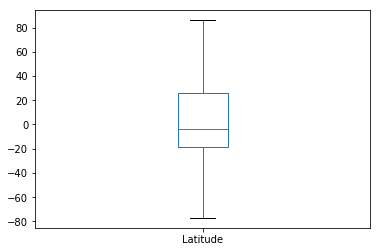

In [112]:

df.Latitude.plot.box()
plt.figure()

print("vemos que ocorrem os terremotos mais nas regiões centrais")
df.Latitude.describe()

vemos que a maioria ocorre no oeste


count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

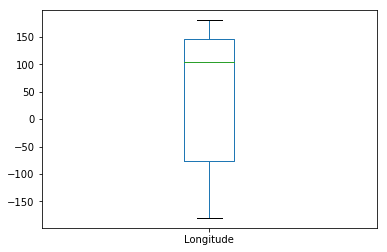

In [113]:


df.Longitude.plot.box()
plt.figure()

print("vemos que a maioria ocorre no oeste")
df.Longitude.describe()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [114]:

magnitute_type = pd.crosstab(df["Magnitude Type"], df.Hemisfério, normalize=True)*100
types = pd.crosstab(df.Type, df.Hemisfério, normalize=True)*100

In [115]:
magnitute_type

Hemisfério,Norte,Sul
Magnitude Type,,
MB,7.194122,8.873035
MD,0.025632,0.000000
MH,0.021360,0.000000
ML,0.328947,0.000000
MS,3.272386,3.994361
MW,15.738209,17.250513
MWB,4.750513,5.750171
MWC,10.205913,14.012303
MWR,0.051265,0.059809


In [116]:
types

Hemisfério,Norte,Sul
Type,,
Earthquake,44.714023,54.517107
Explosion,0.008543,0.008543
Nuclear Explosion,0.627910,0.119602
Rock Burst,0.000000,0.004271


é mais provável ter acontecido no sul